#  Sunspot Cycle Analysis

### Solar cycles or Sunspot cycles are approximately 11-year cycles during which the Sun's magnetic activity fluctuates. These cycles are characterized by changes in the number of sunspots, solar flares, and other solar phenomena. Understanding solar cycles is crucial for predicting space weather, which can impact satellite operations, communication systems, and even power grids on Earth.

## Objective

### The objective of this analysis is to visualize and understand the patterns in solar cycles using historical data on sunspot numbers. By analyzing these patterns, we aim to gain insights into the behavior of solar activity and how it affects other activites over time.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


# Dataset Overview

In [ ]:
sunspot = pd.read_csv('drive/My Drive/Sunspots1.csv', index_col=0)
sunspot

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


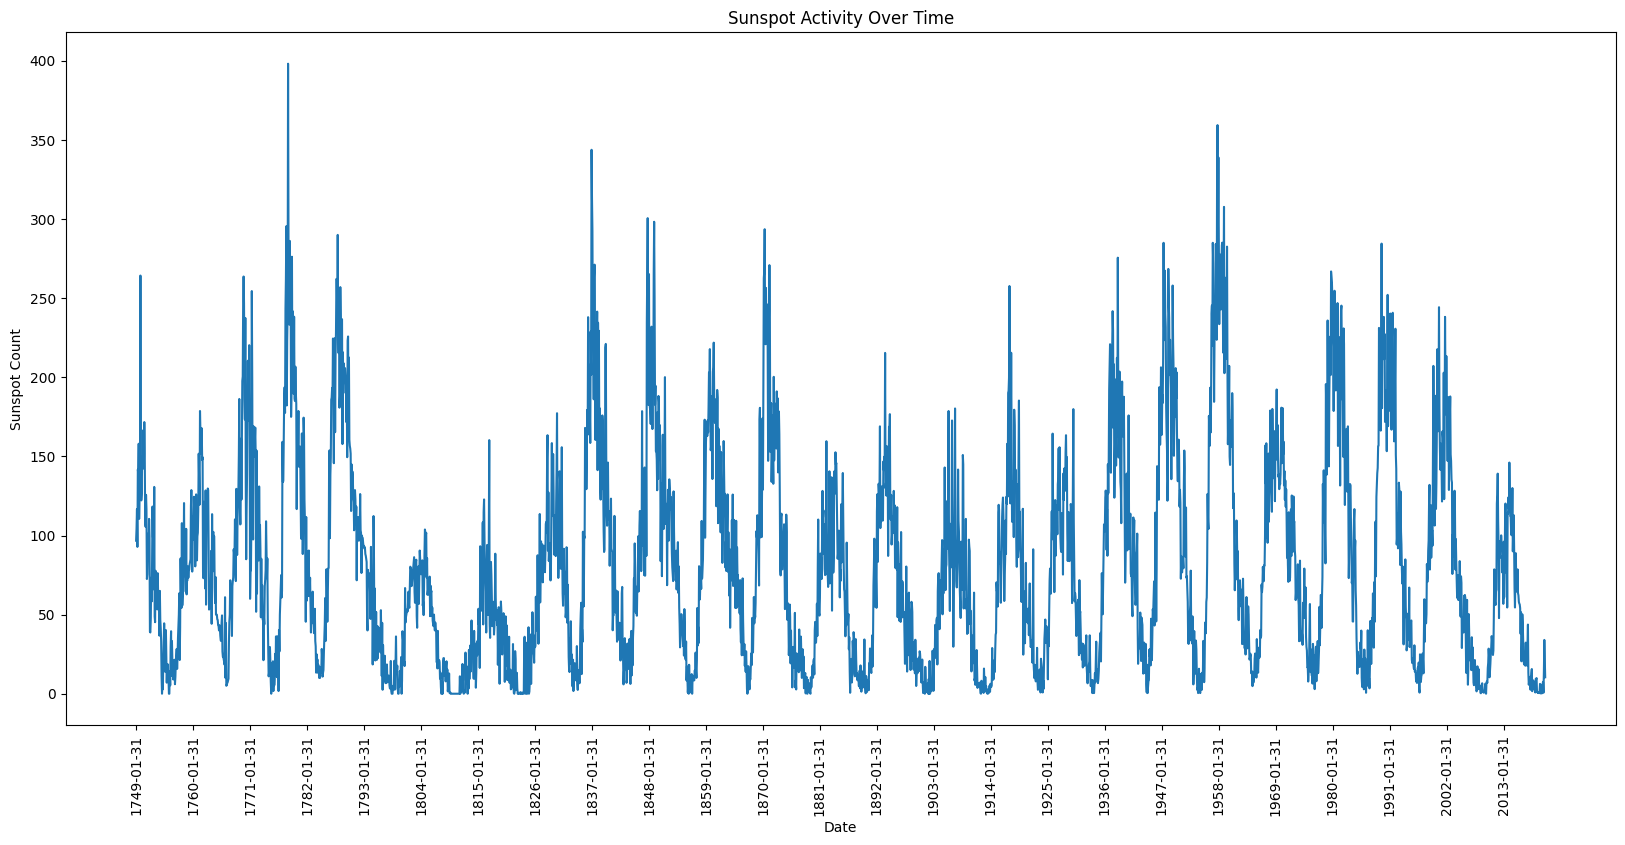

In [ ]:
plt.figure(figsize=(20, 9))

sns.lineplot(x='Date', y='Monthly Mean Total Sunspot Number', data=sunspot)

xticks = sunspot['Date'][::12*11]
plt.xticks(xticks, rotation=90, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.title('Sunspot Activity Over Time')

plt.show()


### This graph shows the monthly sunspot numbers from 1749 to 2021. Each solar cycle starts from a minimum number of sunspots (solar minimum), rises to a maximum number of sunspots (solar maximum), and then declines back to a minimum. This cyclical pattern repeats approximately every 11 years, although the exact length of each cycle can vary slightly.

### The entire process from one solar minimum to the next solar minimum averages about 11 years, though it can range from 9 to 14 years. During this period, the Sun undergoes significant changes that affect not only solar radiation but also space weather, which can have various effects on Earth's atmosphere and technological systems.

# Cleaning of data
## To remove the half cycle data and end cycle from start and stop of the sunspot numbers so that each cycle is represented properly and to check for missing values

In [ ]:
sunspot.isna().values.any()

False

In [ ]:
ssn = sunspot[(sunspot['Date']>='1755-05-31') & (sunspot['Date']<='2020-05-31')]
ssn

,Date,Monthly Mean Total Sunspot Number
76,1755-05-31,0.0
77,1755-06-30,0.0
78,1755-07-31,14.3
79,1755-08-31,5.3
80,1755-09-30,29.7
...,...,...
3252,2020-01-31,6.2
3253,2020-02-29,0.2
3254,2020-03-31,1.5
3255,2020-04-30,5.2


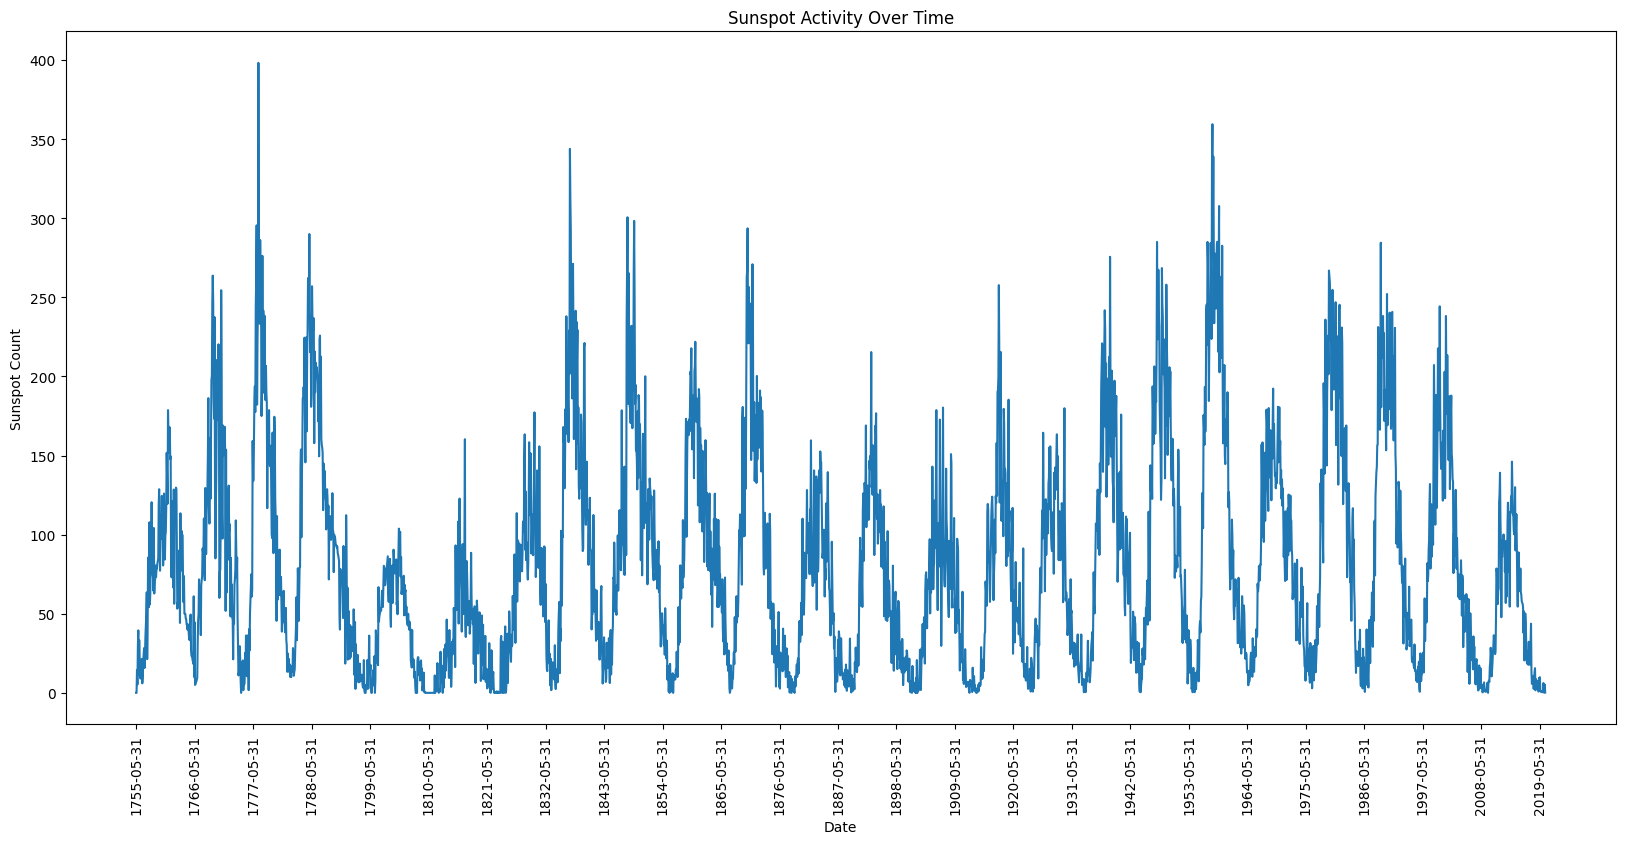

In [ ]:
plt.figure(figsize=(20, 9))

sns.lineplot(x='Date', y='Monthly Mean Total Sunspot Number', data=ssn)

xticks = ssn['Date'][::12*11]
plt.xticks(xticks, rotation=90, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.title('Sunspot Activity Over Time')

plt.show()



# Convert the dataset to International Sunspot Number [ISN]

## The current dataset is in Boulder Sunspot Number [BSN] and that needs to be converted into International Sunspot Number [ISN] for standarizing

In [ ]:
isn = ssn['Monthly Mean Total Sunspot Number']*0.65
isn

76       0.000
77       0.000
78       9.295
79       3.445
80      19.305
         ...  
3252     4.030
3253     0.130
3254     0.975
3255     3.380
3256     0.130
Name: Monthly Mean Total Sunspot Number, Length: 3181, dtype: float64

In [ ]:
ssn.insert(2, "International Sunspot Number", isn)
ssn

,Date,Monthly Mean Total Sunspot Number,International Sunspot Number
76,1755-05-31,0.0,0.000
77,1755-06-30,0.0,0.000
78,1755-07-31,14.3,9.295
79,1755-08-31,5.3,3.445
80,1755-09-30,29.7,19.305
...,...,...,...
3252,2020-01-31,6.2,4.030
3253,2020-02-29,0.2,0.130
3254,2020-03-31,1.5,0.975
3255,2020-04-30,5.2,3.380


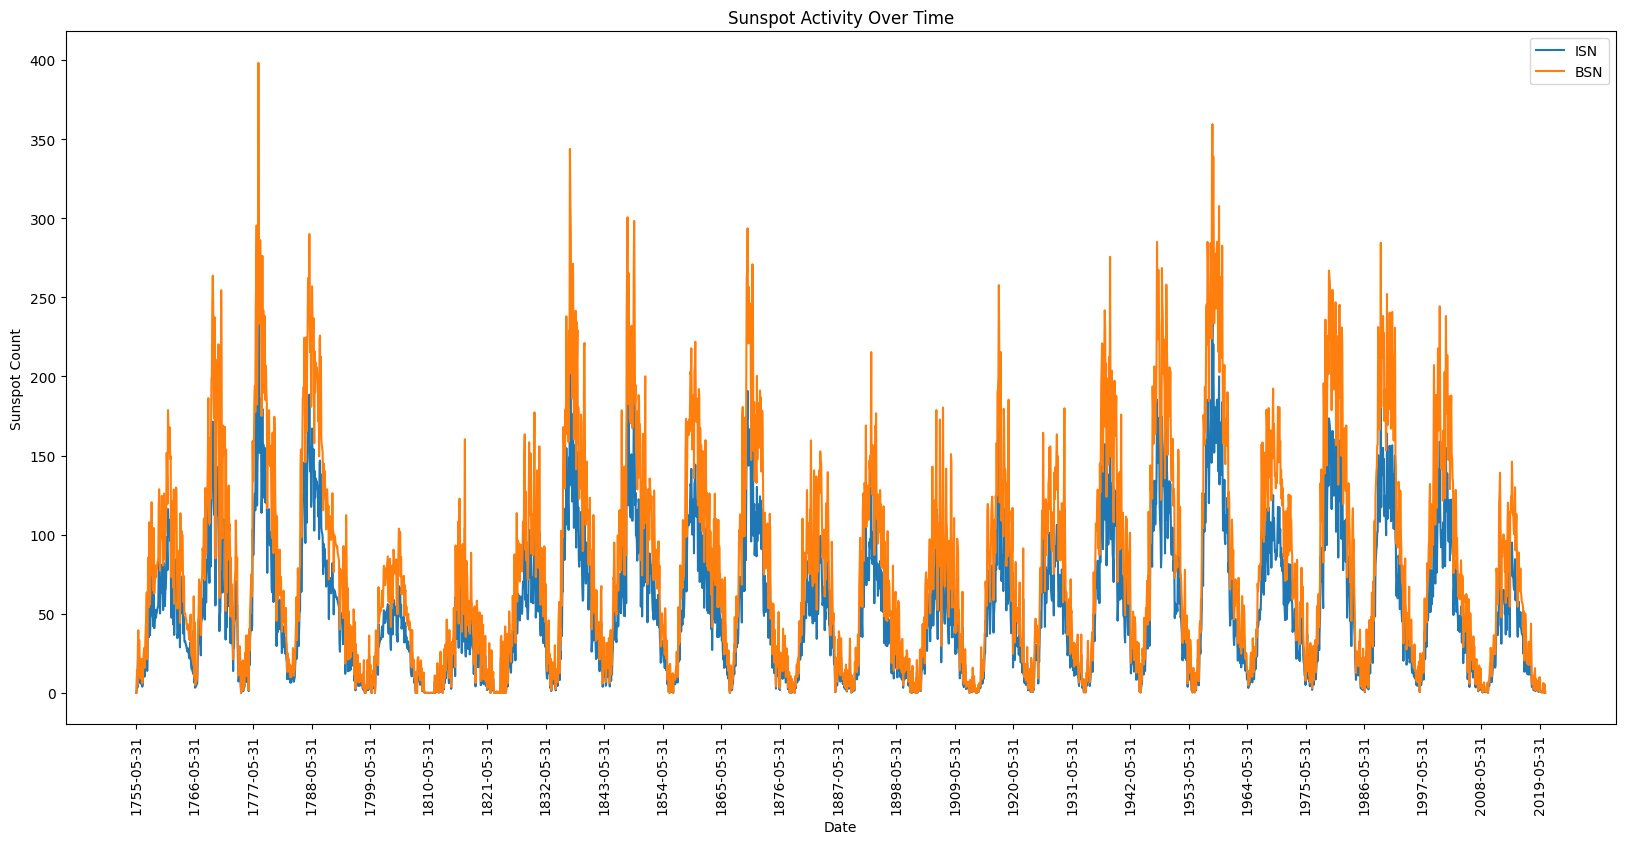

In [ ]:
plt.figure(figsize=(20, 9))

sns.lineplot(x="Date", y="International Sunspot Number",data=ssn, label="ISN")
sns.lineplot(x="Date", y="Monthly Mean Total Sunspot Number",data=ssn, label="BSN")
xticks = ssn['Date'][::12*11]
plt.xticks(xticks, rotation=90, fontsize=10)

plt.xlabel('Date')
plt.ylabel('Sunspot Count')
plt.title('Sunspot Activity Over Time')

plt.show()

# BSN is from the dataset and ISN is calculated from BSN because ISN is used globally

### This graph shows the monthly Boulder Sunspot Numbers (BSN) from 1755 to 2020. The data originally recorded in BSN has been converted to the International Sunspot Number (ISN) for standardization. This conversion is done by multiplying the BSN values by 0.65, as ISN provides a standardized measure of sunspot activity recognized globally.



# Comparing Radio Flux with Sunspot Number

### Sunspot numbers provide a direct measure of solar magnetic activity, while radio flux, specifically the 10.7 cm (2800 MHz) solar radio flux, offers an indirect measure of solar activity, reflecting the amount of radio energy emitted by the Sun. Comparing these two indicators can provide a deeper understanding of solar behavior and enhance the accuracy of solar cycle predictions.

In [ ]:
solar_flux = pd.read_json("drive/My Drive/solarflux.json")
solar_flux

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
0,1749-01,96.7,-1.0,-1.00,-1.0,-1.00,-1.0
1,1749-02,104.3,-1.0,-1.00,-1.0,-1.00,-1.0
2,1749-03,116.7,-1.0,-1.00,-1.0,-1.00,-1.0
3,1749-04,92.8,-1.0,-1.00,-1.0,-1.00,-1.0
4,1749-05,141.7,-1.0,-1.00,-1.0,-1.00,-1.0
...,...,...,...,...,...,...,...
3301,2024-02,124.7,-1.0,116.59,-1.0,173.28,-1.0
3302,2024-03,104.9,-1.0,103.06,-1.0,155.19,-1.0
3303,2024-04,136.5,-1.0,141.10,-1.0,161.70,-1.0
3304,2024-05,171.7,-1.0,146.26,-1.0,188.37,-1.0


In [ ]:
flux=solar_flux[solar_flux["f10.7"]!=-1.00]
flux
#remove missing values represented by -1

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
3069,2004-10,74.2,57.9,77.94,61.2,137.56,-1.0
3070,2004-11,70.1,56.6,70.50,59.9,115.98,-1.0
3071,2004-12,28.9,55.7,34.74,58.7,95.66,-1.0
3072,2005-01,48.1,54.5,52.00,57.2,102.86,-1.0
3073,2005-02,43.5,53.2,45.36,56.3,97.30,-1.0
...,...,...,...,...,...,...,...
3301,2024-02,124.7,-1.0,116.59,-1.0,173.28,-1.0
3302,2024-03,104.9,-1.0,103.06,-1.0,155.19,-1.0
3303,2024-04,136.5,-1.0,141.10,-1.0,161.70,-1.0
3304,2024-05,171.7,-1.0,146.26,-1.0,188.37,-1.0


In [ ]:
flux.rename(columns = {'time-tag':'Date'}, inplace = True)
flux

<ipython-input-15-20c70e330cac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flux.rename(columns = {'time-tag':'Date'}, inplace = True)


,Date,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
3069,2004-10,74.2,57.9,77.94,61.2,137.56,-1.0
3070,2004-11,70.1,56.6,70.50,59.9,115.98,-1.0
3071,2004-12,28.9,55.7,34.74,58.7,95.66,-1.0
3072,2005-01,48.1,54.5,52.00,57.2,102.86,-1.0
3073,2005-02,43.5,53.2,45.36,56.3,97.30,-1.0
...,...,...,...,...,...,...,...
3301,2024-02,124.7,-1.0,116.59,-1.0,173.28,-1.0
3302,2024-03,104.9,-1.0,103.06,-1.0,155.19,-1.0
3303,2024-04,136.5,-1.0,141.10,-1.0,161.70,-1.0
3304,2024-05,171.7,-1.0,146.26,-1.0,188.37,-1.0


In [ ]:
date_ssn=ssn[ssn["Date"]>='2004-10-31']
date_ssn
#to select the ssn from the specified date to match with flux data

,Date,Monthly Mean Total Sunspot Number,International Sunspot Number
3069,2004-10-31,74.2,48.230
3070,2004-11-30,70.1,45.565
3071,2004-12-31,28.9,18.785
3072,2005-01-31,48.1,31.265
3073,2005-02-28,43.5,28.275
...,...,...,...
3252,2020-01-31,6.2,4.030
3253,2020-02-29,0.2,0.130
3254,2020-03-31,1.5,0.975
3255,2020-04-30,5.2,3.380


In [ ]:
flux["Date"] = pd.to_datetime(flux["Date"], format='%Y-%m') + pd.offsets.MonthEnd(0)
flux["Date"] = pd.to_datetime(flux["Date"])
date_ssn["Date"] = pd.to_datetime(date_ssn["Date"])

<ipython-input-17-fc7fe6059228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flux["Date"] = pd.to_datetime(flux["Date"], format='%Y-%m') + pd.offsets.MonthEnd(0)
<ipython-input-17-fc7fe6059228>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flux["Date"] = pd.to_datetime(flux["Date"])
<ipython-input-17-fc7fe6059228>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
flux = flux[flux["Date"]<="2020-05-31"]
flux
#to select from specified date to match with ssn data

,Date,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
3069,2004-10-31,74.2,57.9,77.94,61.2,137.56,-1.0
3070,2004-11-30,70.1,56.6,70.50,59.9,115.98,-1.0
3071,2004-12-31,28.9,55.7,34.74,58.7,95.66,-1.0
3072,2005-01-31,48.1,54.5,52.00,57.2,102.86,-1.0
3073,2005-02-28,43.5,53.2,45.36,56.3,97.30,-1.0
...,...,...,...,...,...,...,...
3252,2020-01-31,6.2,2.2,5.94,2.3,72.32,69.5
3253,2020-02-29,0.2,2.7,0.38,2.8,70.90,69.8
3254,2020-03-31,1.5,3.0,1.19,3.1,70.19,70.1
3255,2020-04-30,5.2,3.6,4.83,3.6,69.56,70.5


In [ ]:
flux.Date = pd.to_datetime(flux.Date)
date_ssn.Date = pd.to_datetime(date_ssn.Date)

<ipython-input-19-b0cd8df4b3c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flux.Date = pd.to_datetime(flux.Date)
<ipython-input-19-b0cd8df4b3c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_ssn.Date = pd.to_datetime(date_ssn.Date)


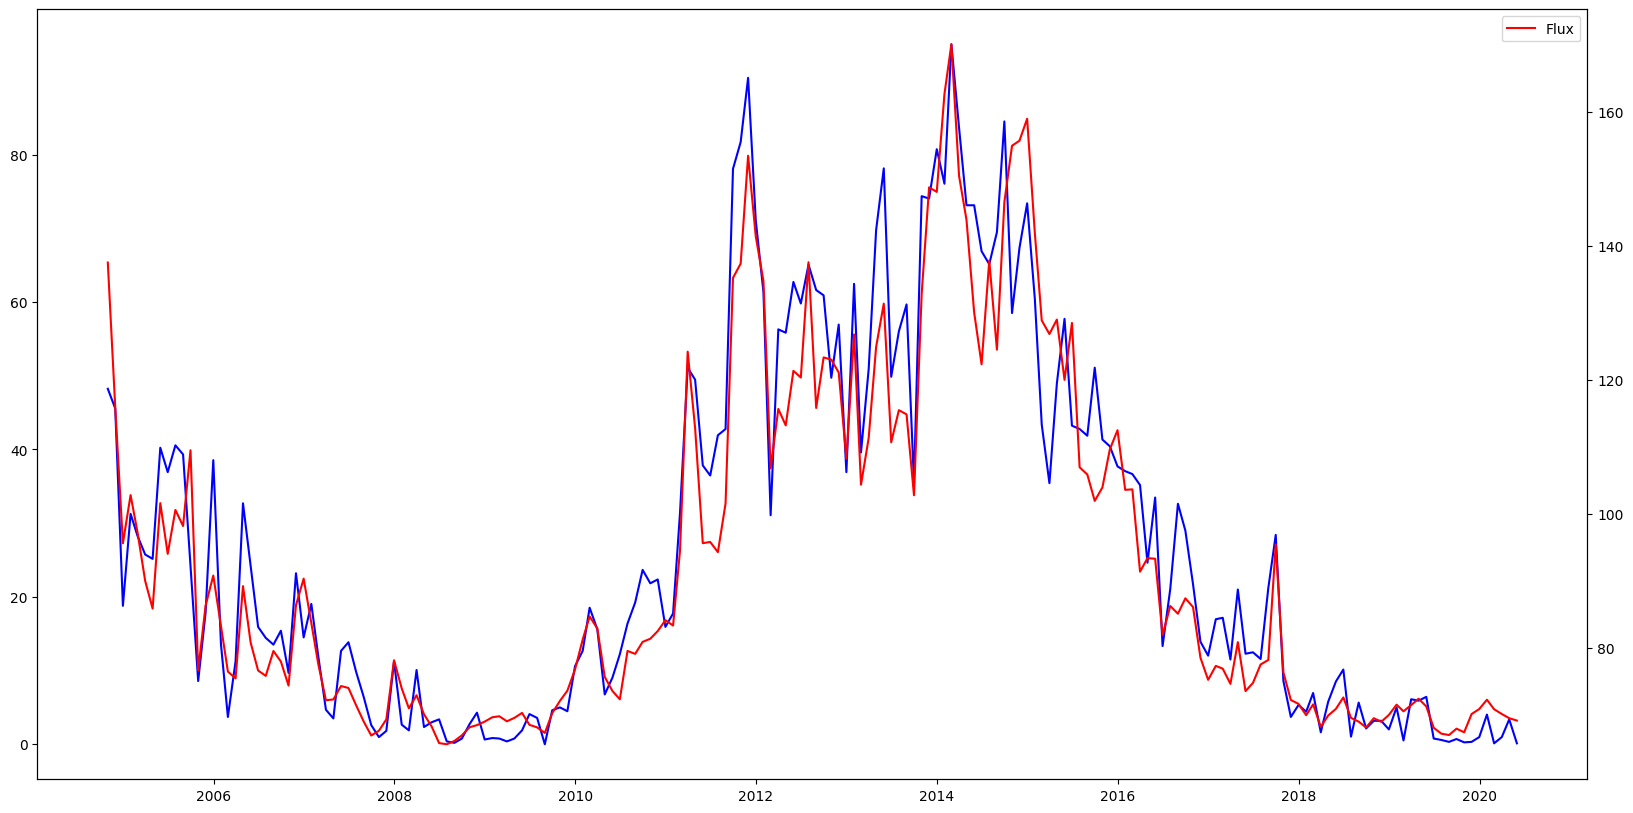

In [ ]:
plt.figure(figsize=(20,10))
pl1 = plt.gca()
pl2 = plt.twinx()
pl1.plot(date_ssn["Date"], date_ssn["International Sunspot Number"], label="ISN", color='b')
pl2.plot(flux["Date"], flux["f10.7"], label="Flux", color='r')
plt.legend()
plt.show()
# red - radio flux, blue - ssn number from this graph it shows that whenever sunspot number increases the radio flux also increases

### This graph displays the International Sunspot Numbers (ISN) and the 10.7 cm solar radio flux from 2004 to 2020. The sunspot numbers are represented in blue, while the radio flux is represented in red. Both indicators exhibit closely aligned cyclical patterns, highlighting the correlation between them.

### The graph clearly shows that sunspot numbers and radio flux rise and fall in tandem. When sunspot numbers increase, indicating higher solar activity, the radio flux also increases. Conversely, when sunspot numbers decrease, the radio flux declines as well.

### While the overall patterns are similar, slight differences in the amplitude of the fluctuations can be observed. These differences may be due to the distinct ways in which sunspot numbers and radio flux measure solar activity.

# Comparing Polar field  with Sunspot Number

### Sunspot numbers are a direct measure of solar magnetic activity, while the polar field strength refers to the magnetic field at the Sun's poles. Comparing these two indicators can provide a deeper understanding of the solar cycle and its underlying magnetic dynamics.

In [ ]:
polar = pd.read_csv("/content/drive/My Drive/polar.csv")
polar

,year,N,S
0,1976-05,89,-126
1,1976-06,99,-121
2,1976-06,107,-114
3,1976-06,117,-107
4,1976-07,119,-99
...,...,...,...
1603,2020-04,51,-67
1604,2020-04,51,-63
1605,2020-05,53,-59
1606,2020-05,53,-61


In [ ]:
polar.drop_duplicates(subset=["year"], keep='last', inplace=True)
polar

,year,N,S
0,1976-05,89,-126
3,1976-06,117,-107
6,1976-07,135,-94
9,1976-08,117,-66
12,1976-09,129,-62
...,...,...,...
1595,2020-01,48,-89
1597,2020-02,43,-76
1601,2020-03,48,-61
1604,2020-04,51,-63


In [ ]:
polar['year'] = pd.to_datetime(polar['year'], format='%Y-%m') + pd.offsets.MonthEnd(0)
polar

,year,N,S
0,1976-05-31,89,-126
3,1976-06-30,117,-107
6,1976-07-31,135,-94
9,1976-08-31,117,-66
12,1976-09-30,129,-62
...,...,...,...
1595,2020-01-31,48,-89
1597,2020-02-29,43,-76
1601,2020-03-31,48,-61
1604,2020-04-30,51,-63


In [ ]:
polar.N = pd.to_numeric(polar.N)


In [ ]:
polar.S = pd.to_numeric(polar.S)

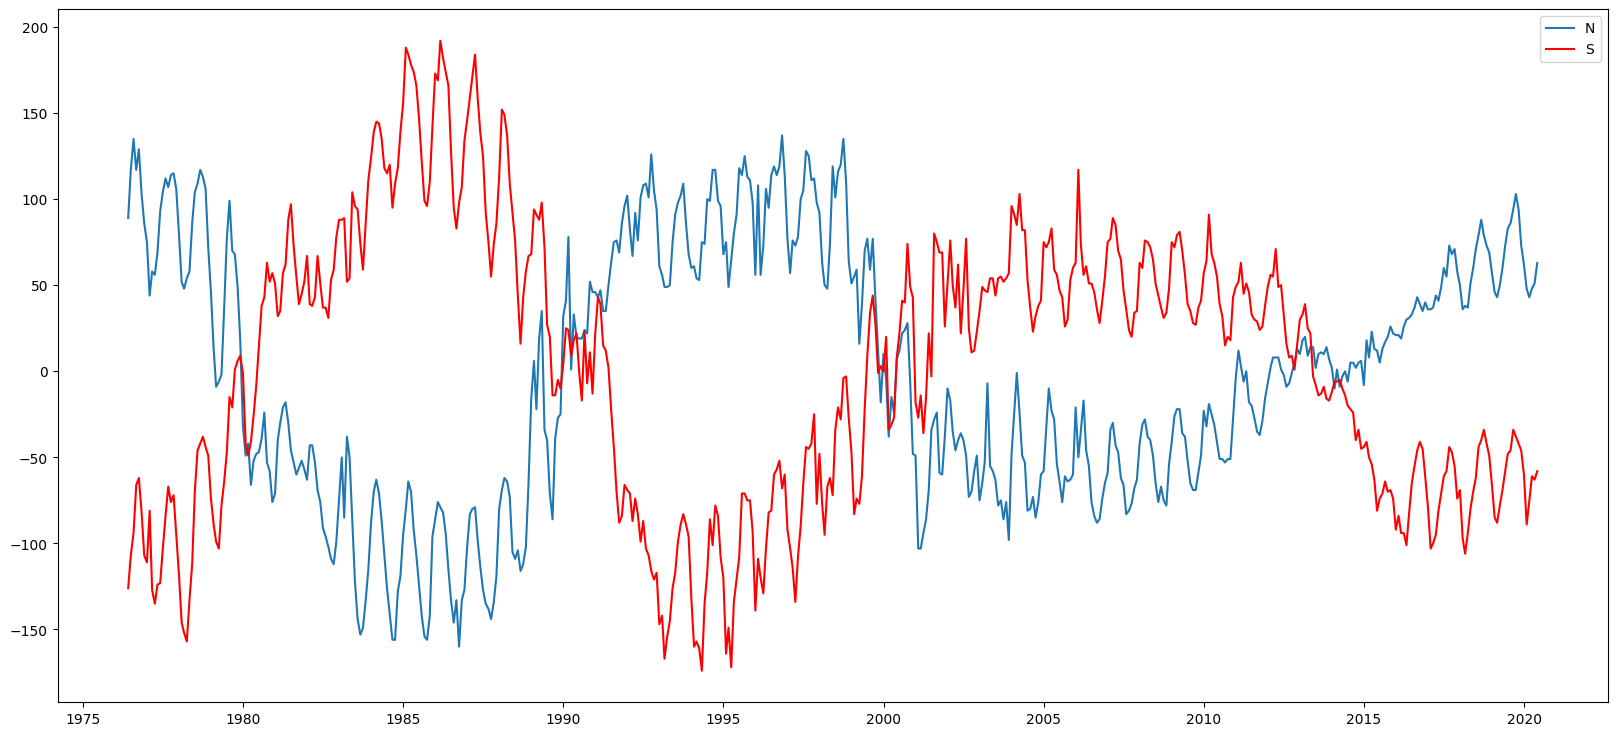

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(polar.year, polar.N, label="N")
plt.plot(polar.year, polar.S, label="S", color='r')
plt.legend()
plt.show()
# polar field strength at north and south pole of sun

### The graph indicates that polar field strength and sunspot numbers are inversely related , when one is maximum the other is at minima

In [ ]:
ssn_polar = ssn[(ssn.Date>"1976") & (ssn.Date<="2020-05-31")]
ssn_polar.Date = pd.to_datetime(ssn_polar.Date)

<ipython-input-26-835c16bad30a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ssn_polar.Date = pd.to_datetime(ssn_polar.Date)


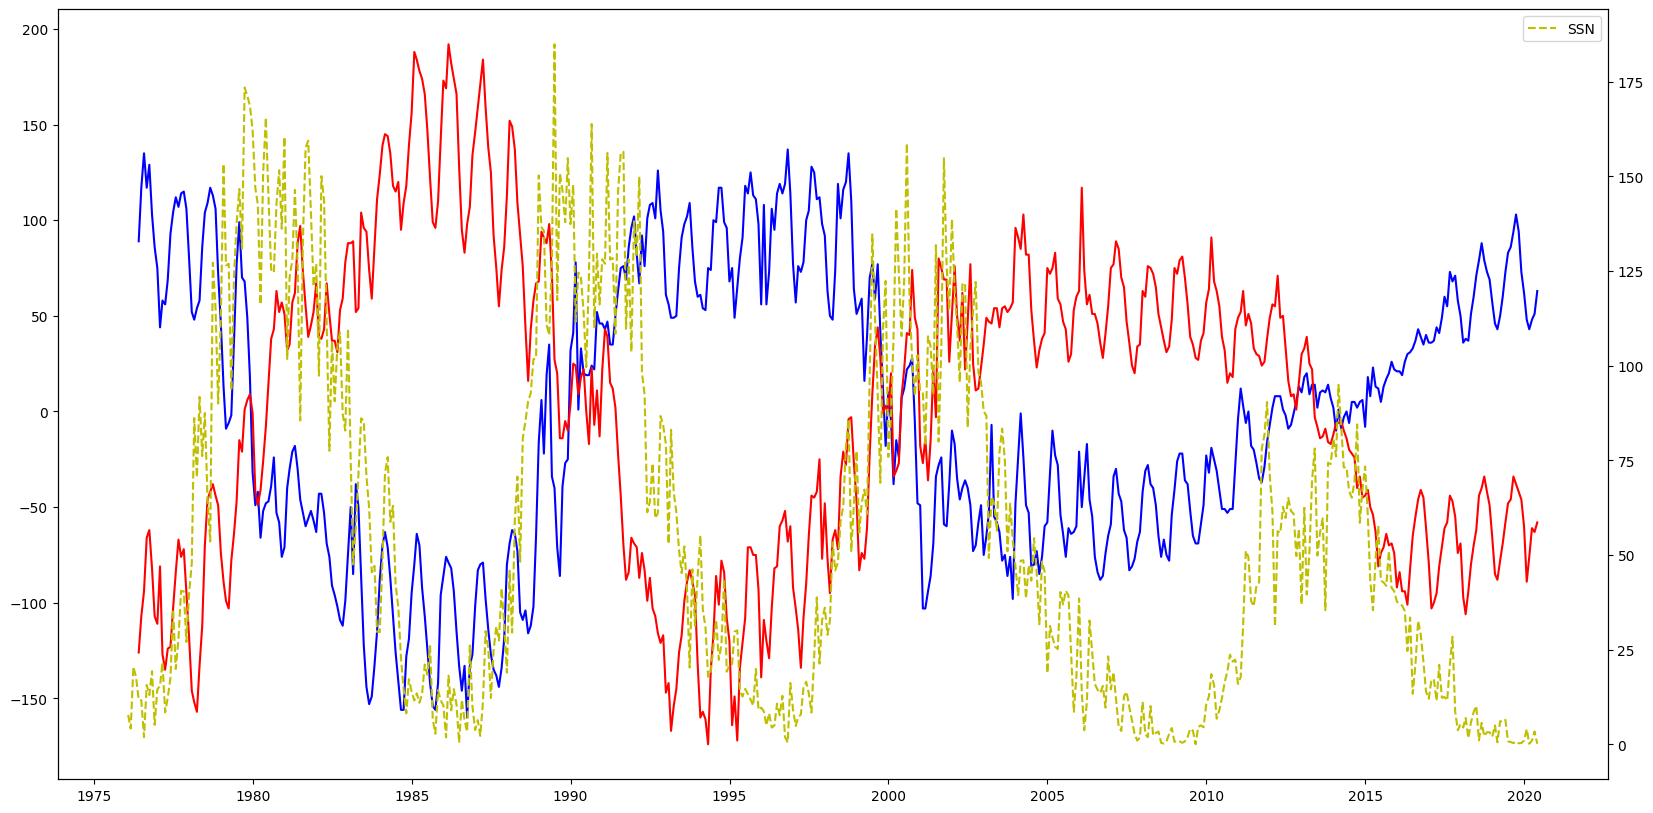

In [ ]:
plt.figure(figsize=(20,10))
pl1 = plt.gca()
pl2 = plt.twinx()
pl1.plot(polar.year, polar.N, color="b")
pl1.plot(polar.year, polar.S, color="r")
pl2.plot(ssn_polar.Date, ssn_polar["International Sunspot Number"], color = 'y', linestyle='--', label="SSN")
plt.legend()
plt.show()
# from the below graph whenever ssn increases either N or S will be at peak
# red - North , blue - South

### The graph indicates an inverse relationship between sunspot numbers and polar field strength. When sunspot numbers increase, indicating a solar maximum, the polar field strengths of either the north or south pole reach their peaks.

### This alternation occurs because the Sun's magnetic field reverses approximately every 11 years, causing the north and south poles to switch their magnetic polarity.

# Seasonality and lag of graph

### Lag plots are useful for checking whether the data is random or not. If there is an observable pattern in the lag plot, we can leverage that information to make predictions

In [ ]:
lag = ssn
lag["lag1"] = ssn["International Sunspot Number"].shift(+1)
lag.dropna(inplace=True)
lag

<ipython-input-28-c66e7025146a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag["lag1"] = ssn["International Sunspot Number"].shift(+1)
<ipython-input-28-c66e7025146a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag.dropna(inplace=True)


,Date,Monthly Mean Total Sunspot Number,International Sunspot Number,lag1
78,1755-07-31,14.3,9.295,0.000
79,1755-08-31,5.3,3.445,9.295
80,1755-09-30,29.7,19.305,3.445
81,1755-10-31,39.5,25.675,19.305
82,1755-11-30,11.3,7.345,25.675
...,...,...,...,...
3252,2020-01-31,6.2,4.030,0.975
3253,2020-02-29,0.2,0.130,4.030
3254,2020-03-31,1.5,0.975,0.130
3255,2020-04-30,5.2,3.380,0.975


<Axes: xlabel='lag1', ylabel='International Sunspot Number'>

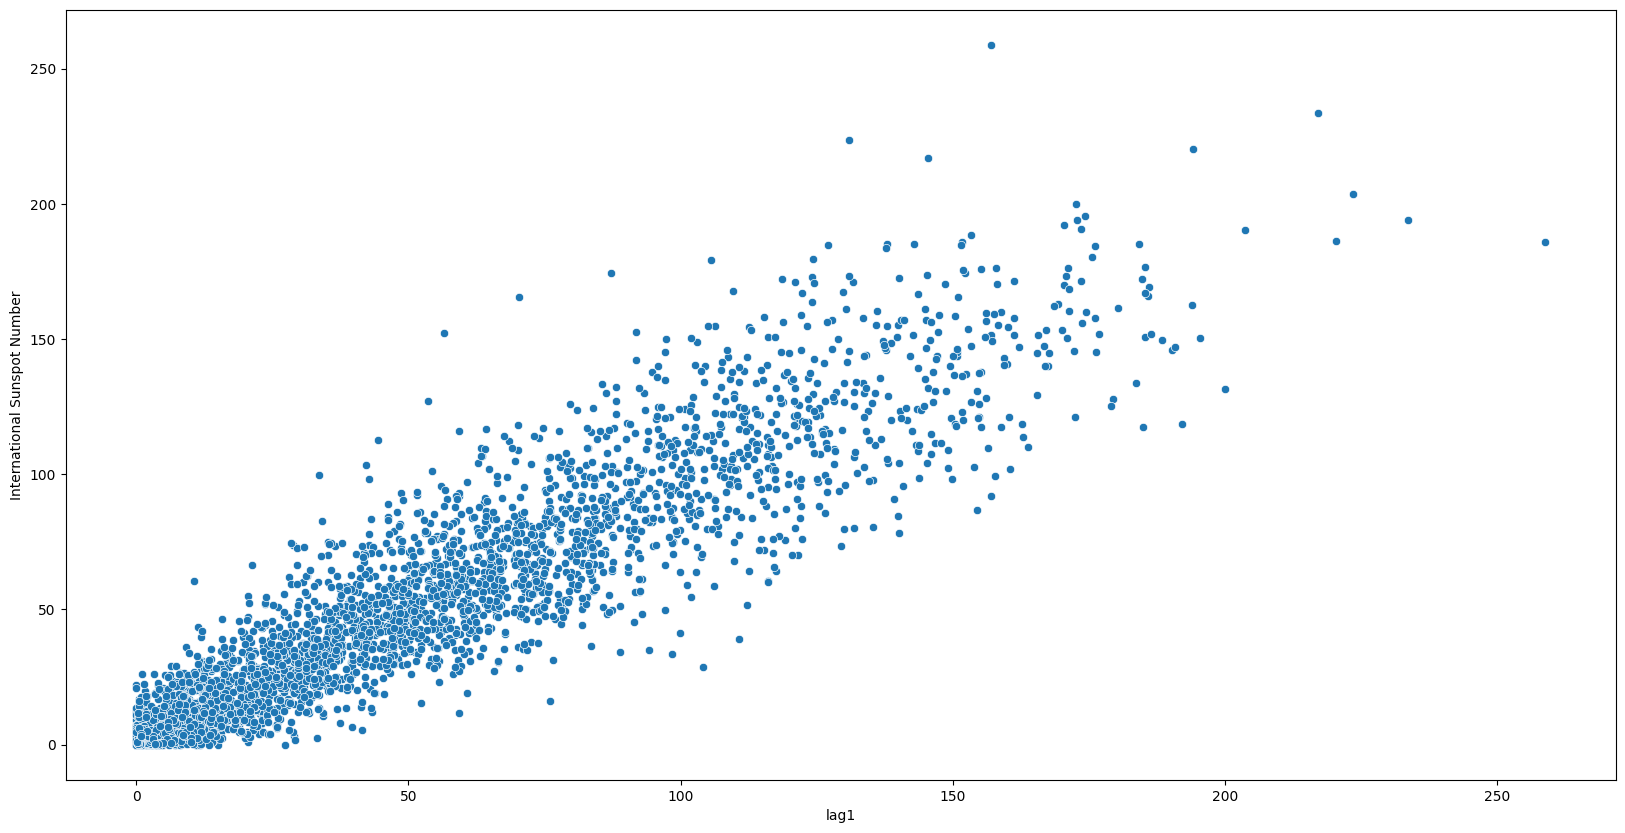

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=lag,x=lag.lag1, y=lag["International Sunspot Number"])
# this graph tells that the data is not random but there is a sequence in which the data repeats

### We see a strong and positive correlation. This implies that the data is not random. Moreover, it means that as sunspot numbers rise, they tend to keep rising (and vice versa).

In [ ]:
rol_avg = lag["International Sunspot Number"].rolling(window=12*11).mean()
lag["rolling_avg"] = rol_avg

<ipython-input-29-49b142f643c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag["rolling_avg"] = rol_avg


In [ ]:
lag.Date = pd.to_datetime(lag.Date)

<ipython-input-30-c14e9fc76120>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag.Date = pd.to_datetime(lag.Date)


In [ ]:
lag.dropna(inplace=True)
lag

<ipython-input-31-fbc0a69e80ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lag.dropna(inplace=True)


,Date,Monthly Mean Total Sunspot Number,International Sunspot Number,lag1,rolling_avg
209,1766-06-30,5.0,3.250,29.055,46.390795
210,1766-07-31,5.5,3.575,3.250,46.347462
211,1766-08-31,6.7,4.355,3.575,46.354356
212,1766-09-30,7.2,4.680,4.355,46.243561
213,1766-10-31,8.3,5.395,4.680,46.089924
...,...,...,...,...,...
3252,2020-01-31,6.2,4.030,0.975,32.177462
3253,2020-02-29,0.2,0.130,4.030,32.172538
3254,2020-03-31,1.5,0.975,0.130,32.176970
3255,2020-04-30,5.2,3.380,0.975,32.196667


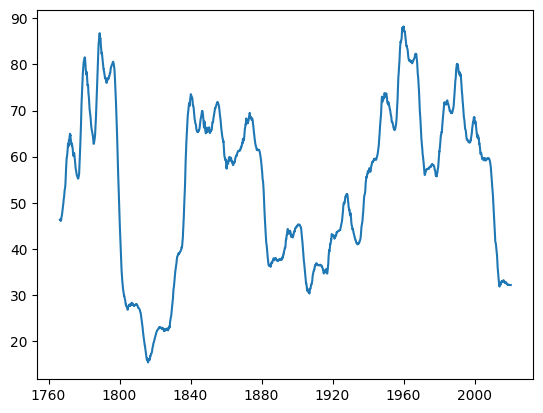

In [ ]:
plt.plot(lag.Date, lag.rolling_avg)
# The moving average plot exposes the lows, highs and valleys in sunspot numbers over the years.

### The moving average plot now clearly exposes the lows, highs and valleys in sunspot numbers over the years. We see a deep minimum and a steep valley from around 1790 to 1820 - this is the Dalton Minimum named after the English meteorologist John Dalton. Then, after a surge in sunspot numbers until around 1860, we again see a dip and a wide valley. There is a peak at around 1960, then a rapid drop around 1969, then a rise and then a drop again until a few years ago.

# Comparing Total Solar irradance[TSI] with Sunspot Number

### TSI measures the total amount of solar energy received at the top of Earth's atmosphere, while sunspot numbers provide a count of the visible solar magnetic activity. Comparing TSI with sunspot numbers helps in understanding how variations in solar activity impact the amount of solar energy reaching Earth.

In [ ]:
tsi = pd.read_csv("drive/My Drive/tsi.csv", index_col=0)
tsi

,TSI,Date
0,1366.1024,1983-05-31
1,1366.1208,1983-06-30
2,1366.2850,1983-07-31
3,1366.4202,1983-08-31
4,1366.2335,1983-09-30
...,...,...
303,1365.6570,2008-08-31
304,1365.6647,2008-09-30
305,1365.6759,2008-10-31
306,1365.7065,2008-11-30


In [ ]:
tsi.Date = pd.to_datetime(tsi.Date)

In [ ]:
tsi_ssn = ssn[(ssn.Date>='1983-05-31') & (ssn.Date<='2008-12-31')]
tsi_ssn

,Date,Monthly Mean Total Sunspot Number,International Sunspot Number,lag1,rolling_avg
2812,1983-05-31,132.5,86.125,71.240,71.626553
2813,1983-06-30,131.5,85.475,86.125,71.660038
2814,1983-07-31,108.9,70.785,85.475,71.662992
2815,1983-08-31,96.0,62.400,70.785,71.599470
2816,1983-09-30,69.9,45.435,62.400,71.497045
...,...,...,...,...,...
3115,2008-08-31,0.3,0.195,0.390,59.022955
3116,2008-09-30,1.2,0.780,0.195,58.734886
3117,2008-10-31,4.2,2.730,0.780,58.594053
3118,2008-11-30,6.6,4.290,2.730,58.378371


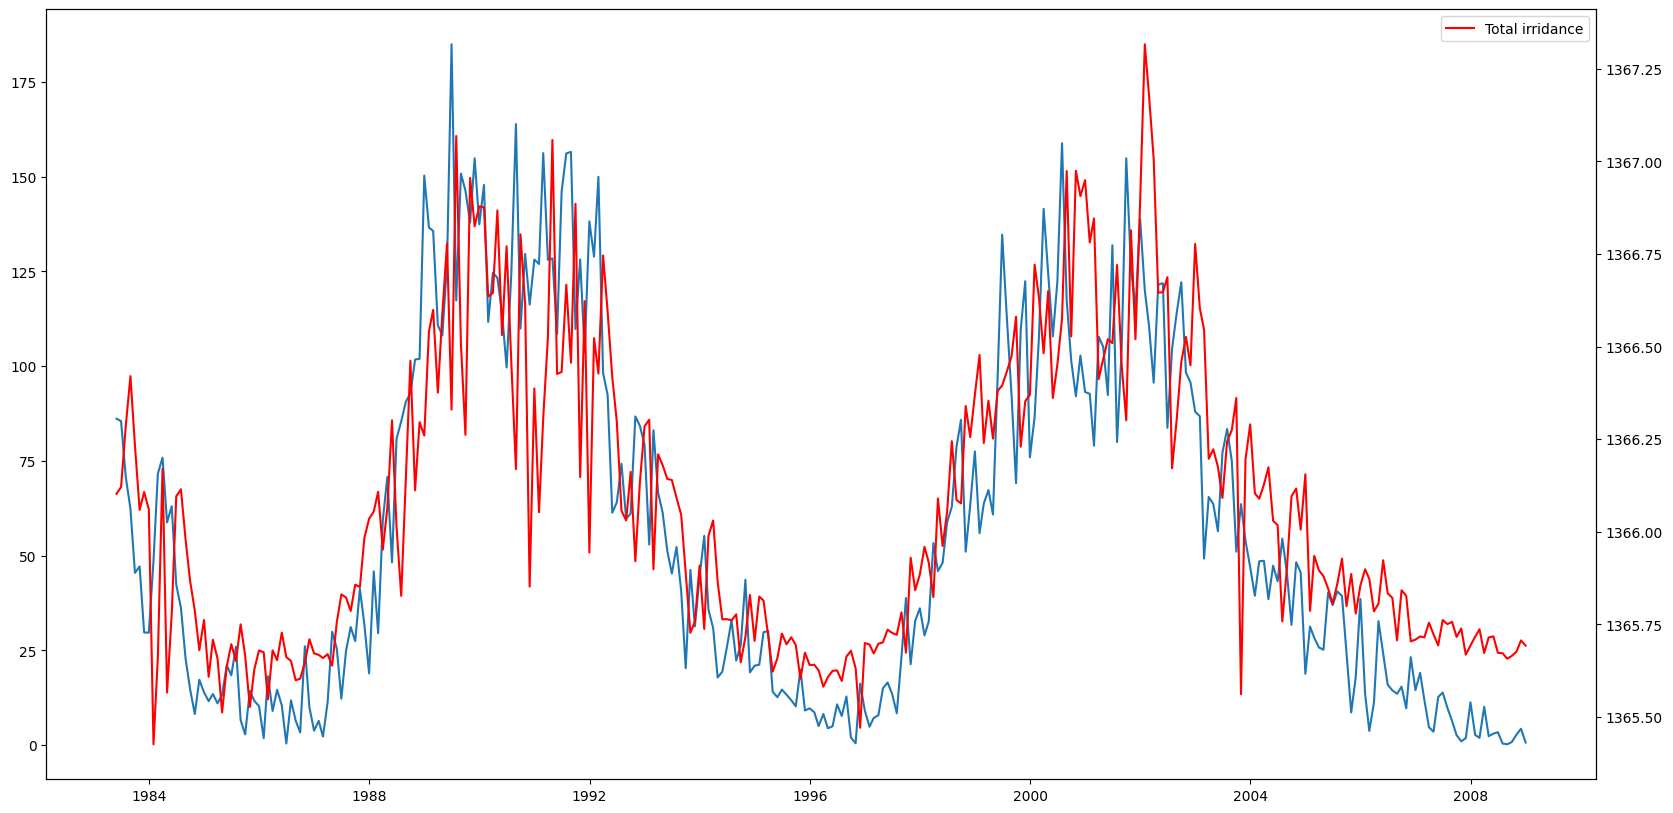

In [ ]:
plt.figure(figsize=(20,10))
p1 = plt.gca()
p2 = plt.twinx()
p1.plot(tsi_ssn.Date, tsi_ssn["International Sunspot Number"], label="Sunspot Number")
p2.plot(tsi.Date, tsi.TSI, color="r", label="Total irridance" )
plt.legend()
plt.show()
# TSI[total solar irradance] - measure of solar power radiation on the earth atmosphere
# this graph tells that whenever ssn increases the tsi also increases

### The graph demonstrates that TSI and sunspot numbers exhibit a positive correlation. As sunspot numbers increase, TSI also tends to increase, indicating that periods of higher solar activity are associated with higher solar irradiance.

# Asymmetry between rises and falls in sunspot numbers

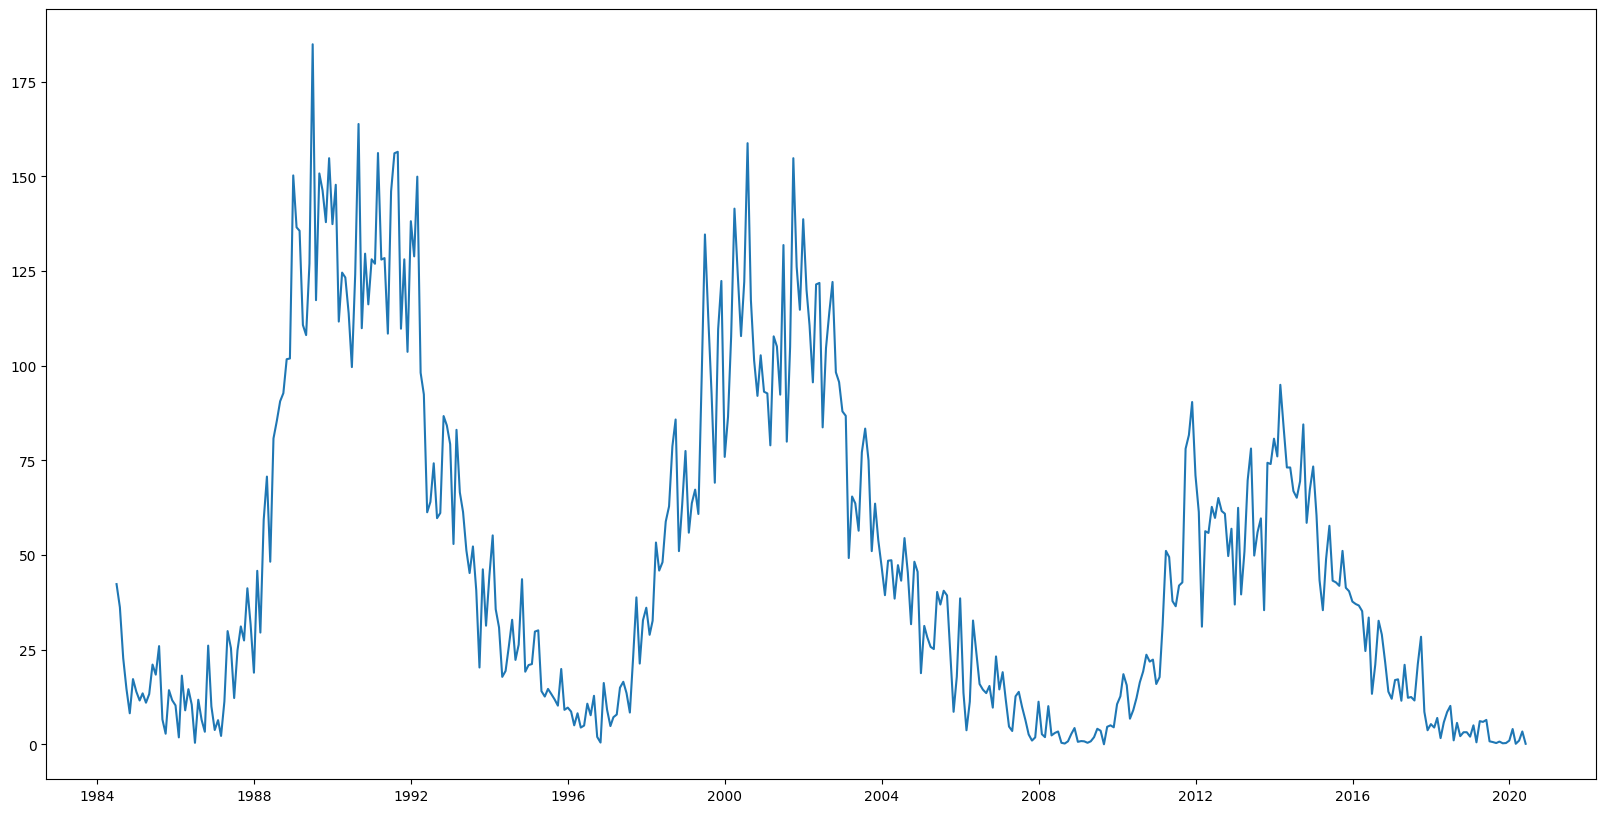

In [ ]:
part_ssn = ssn[-12*36:]
plt.figure(figsize=(20,10))
plt.plot(part_ssn.Date, part_ssn["International Sunspot Number"])
# data of last 3 cycle

### The above graph represent the sunspot numbers of last 3 solar cycles

<Axes: xlabel='Date', ylabel='International Sunspot Number'>

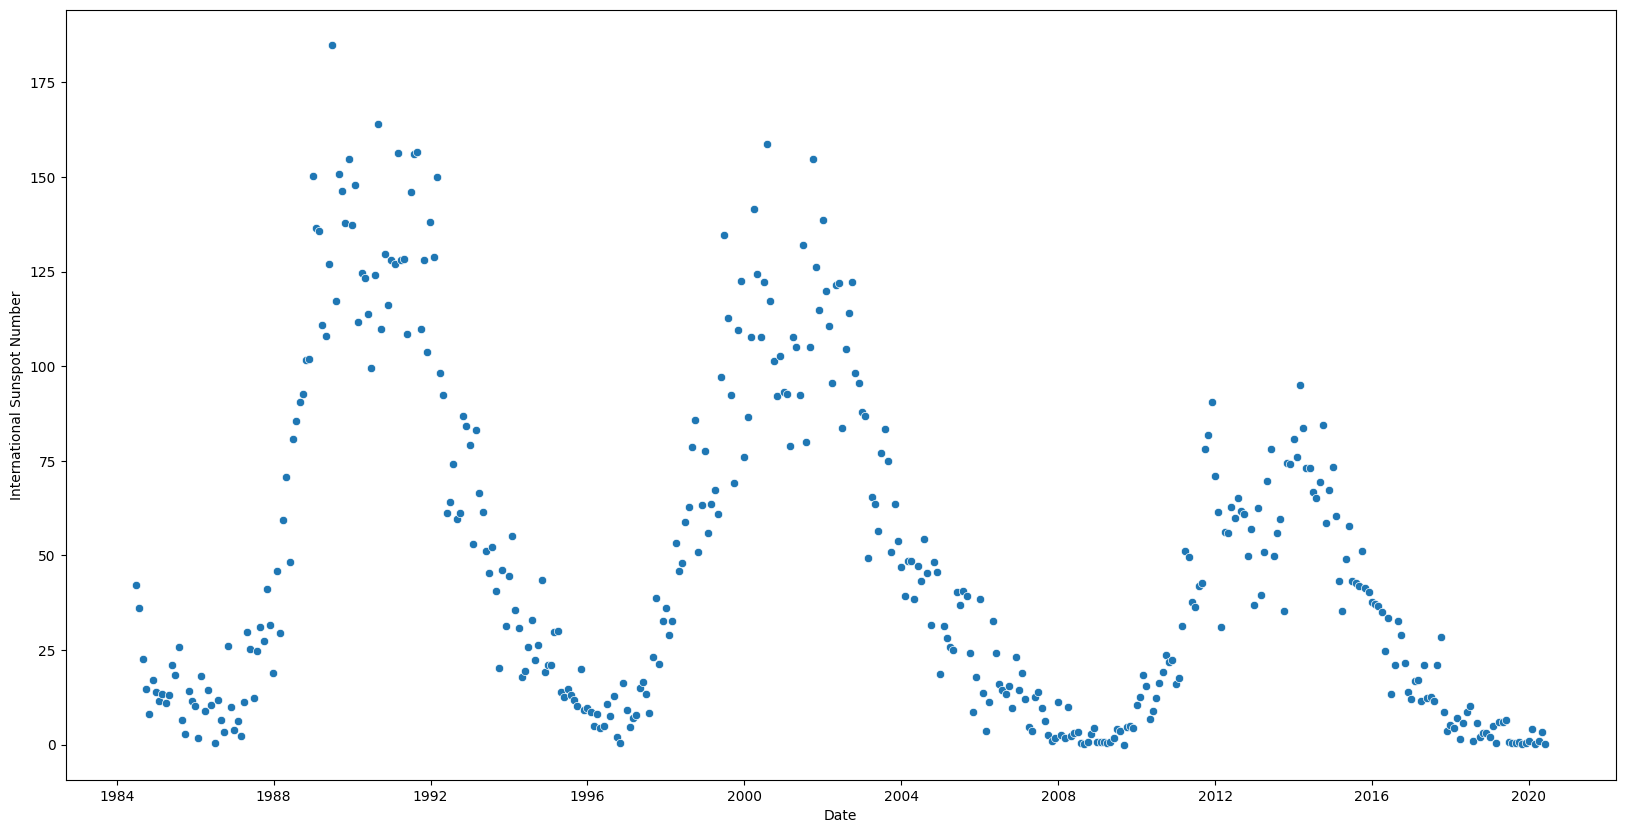

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=part_ssn, x="Date", y="International Sunspot Number")
# data points are dense around minima but scattered around maxima
#his means that when the sun is experiencing low solar activity, it tends to remain in that 'dormant' state.
# However, as soon as solar activity picks up, the change (rise and subsequent fall) in sunspot numbers is much more drastic.
# time period of rise from the minima to peak is less compared to the fall from peak to minima

### It is clearer that the data points are dense around minima but sparse around maxima. This means that when the sun is experiencing low solar activity, it tends to remain in that 'dormant' state. However, as soon as solar activity picks up, the change (rise and subsequent fall) in sunspot numbers is much more drastic.

### The time period between a minimum and a maximum is smaller than the period between the same maximum and the next minimum. This means that when solar activity rises, it tends to rise quickly in comparison to its drop from the maximum to the next minimum.

<ipython-input-40-abfeed3c464f>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_years[year.year] = group.values


<Axes: >

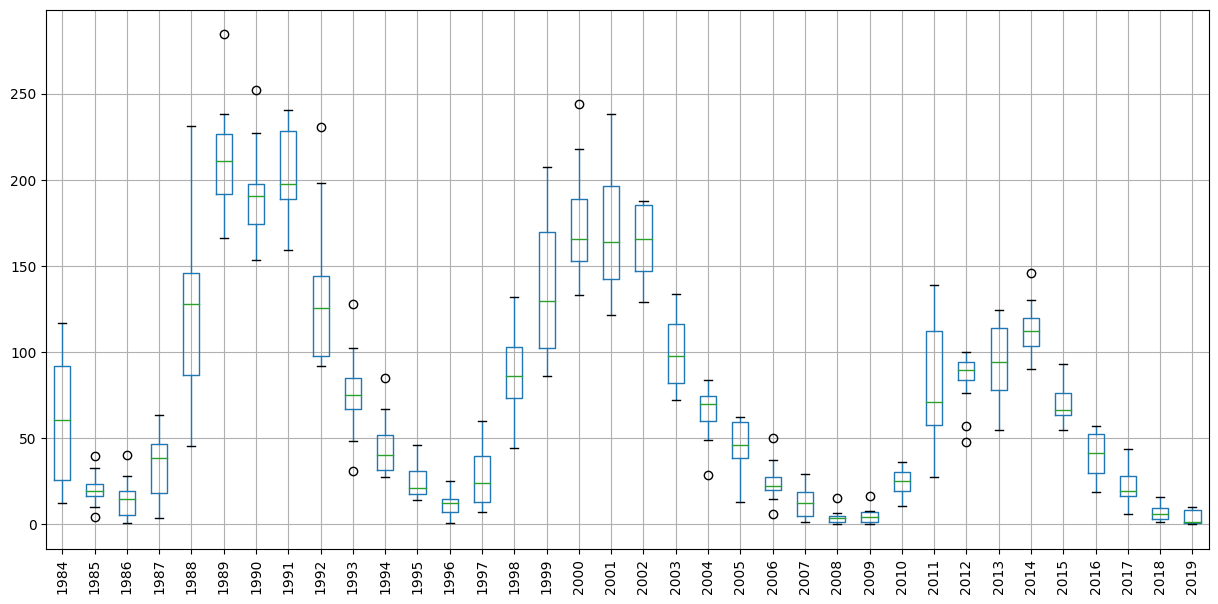

In [ ]:
year_ssn = ssn[(ssn.Date>='1767-01-31') & (ssn.Date<='2019-12-31')]
ser = pd.Series(year_ssn['Monthly Mean Total Sunspot Number'].values,index = year_ssn.Date)
year_groups = ser.groupby(pd.Grouper(freq='Y'))
df_years = pd.DataFrame()
for year, group in year_groups:
    df_years[year.year] = group.values
df_years.loc[:,1984:2020].boxplot(figsize = (15,7), rot = 90)
# verification of the above graph with interquartile range
# the iqr is more elongated during the rise from minima to peak and very small when its falling from peak to minima

### interquartile range (IQR) - for a given year, a large IQR implies a larger variation in sunspot numbers, indicating that change in sunspot numbers was quick

### we can see that the IQR over the years tends to elongate during periods of high solar activity, but squeeze during low activity periods

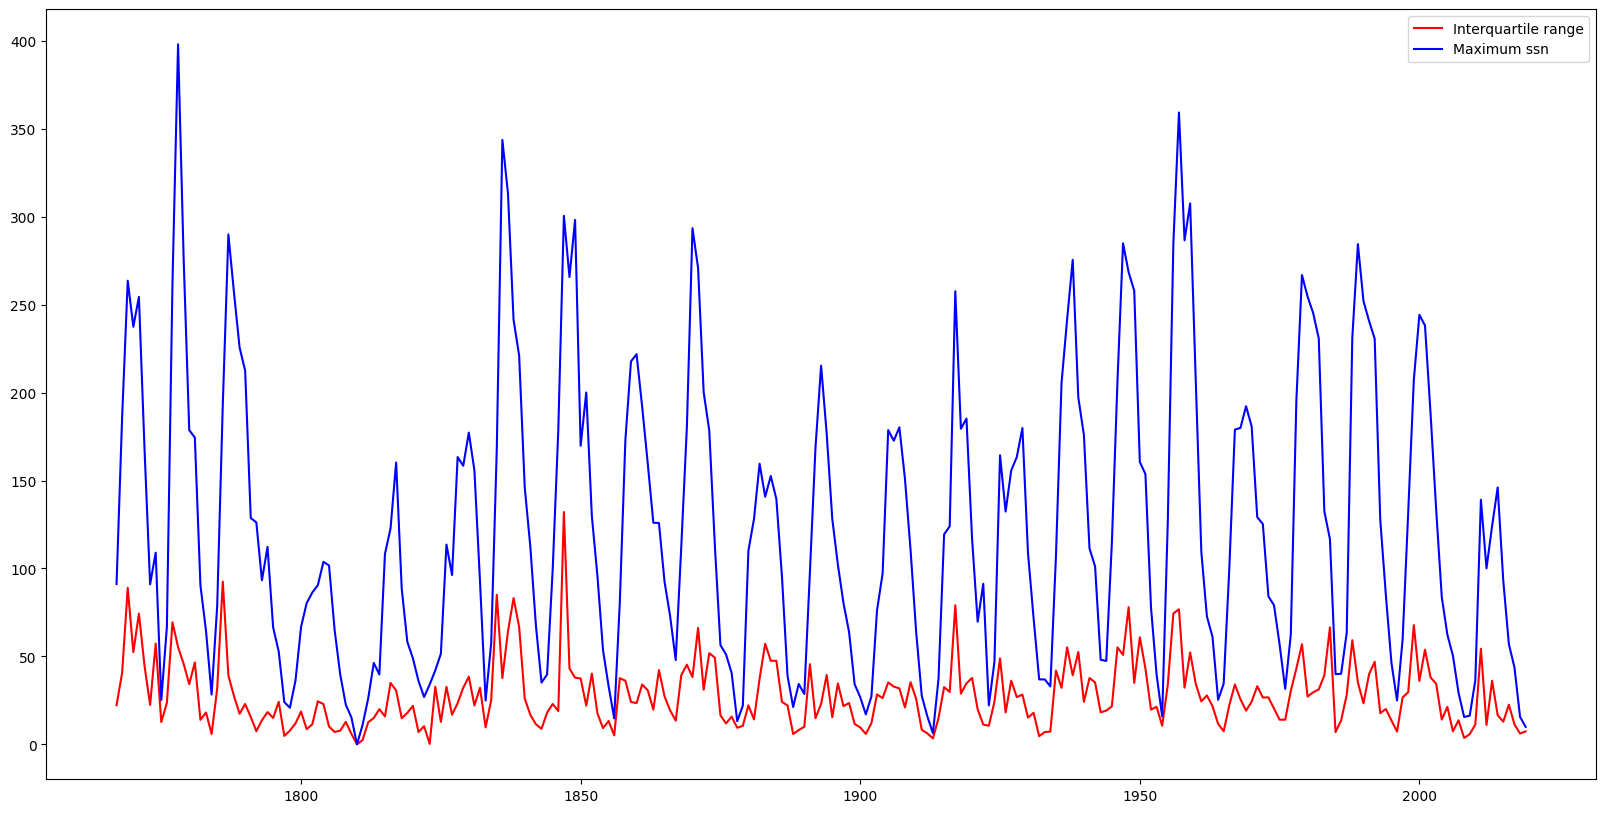

In [ ]:
plt.figure(figsize=(20,10))
interquartile_range_years = df_years.quantile(0.75) - df_years.quantile(0.25)
df_years_max = df_years.max()
plt.plot(interquartile_range_years, color='r', label="Interquartile range")
plt.plot(df_years_max, color='b', label="Maximum ssn")
plt.legend()
plt.show()
# quantitatively confirm this by plotting the interquartile range for each year and noticing that it has peaks around periods of high solar activity,

### We can quantitatively confirm this by plotting the interquartile range for each year and noticing that it has peaks around periods of high solar activity, and troughs around low ones

Text(0.5, 1.0, 'Heatmap of Monthly Mean Total Sunspot Number over the years')

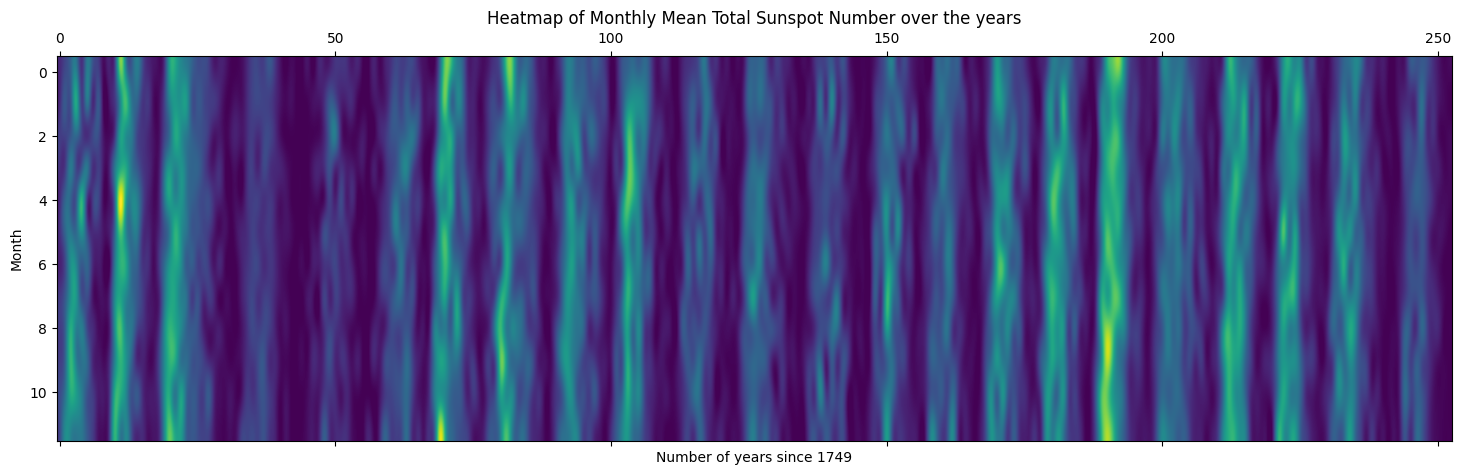

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.matshow(df_years, interpolation='lanczos', aspect='auto')
ax.set_xlabel('Number of years since 1749')
ax.set_ylabel('Month')
ax.set_title('Heatmap of Monthly Mean Total Sunspot Number over the years')
# Brighter colors correspond to higher values of the Monthly Mean Total Sunspot Number and darker ones to lower.
# The heatmap reveals two seasons - the solar cycle of around 11 years and a longer cycle of about 100 years
# Looking at the repetitive pattern of the bright bands' brightness, one can see that it possesses seasonality with a time period of about 100 years
# Moving forward if the bright bands get brighter and they tend to keep getting brighter further

### The heatmap reveals two seasons: 1) the solar cycle of around 11 years and 2) a longer cycle of about 100 years - the brightness of the bright bands oscillate in a specific pattern. Moving forward in time, if the bright bands get brighter, they tend to keep getting brighter further. Looking at the repetitive pattern of the bright bands' brightness, one can see that it possesses seasonality with a time period of about 100 years.